In [52]:
import re
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt

In [53]:
def split_name_text(text_data):

    # Initialize a list to store dictionaries
    entries = []

    # Extract the name and text part from each line
    for line in text_data:
        parts = line.split('/')
        name = parts[2]
        text = line.split(':', 1)[1].strip()
        
        # Create a dictionary for each entry
        entry = {'Name': name, 'Text': text}
        
        # Append the dictionary to the list
        entries.append(entry)

    # Print the list of dictionaries
    # for entry in entries:
    #     print(entry)

    return entries

In [54]:
def filter_dict(text_file, entries):

    if text_file == './spe.text':
        pattern = r'spe(?=[\s\'s])'


    # Initialize a new list to store filtered entries
    filtered_entries = []

    # Iterate through each entry in the list
    for entry in entries:
        if re.search(pattern, entry['Text'], re.IGNORECASE):
            # If the condition is met, append the entry to the filtered list
            filtered_entries.append(entry)

    # Update the entries list with the filtered entries
    entries = filtered_entries

    # Print the updated list of dictionaries
    # for entry in entries:
    #     print(entry)

    return entries

In [55]:

def to_csv(entries):
    # Specify the path for the CSV file
    csv_file = 'output.csv'

    # Write the contents of the list of dictionaries to the CSV file
    with open(csv_file, 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['Name', 'Text'])
        
        # Write the header row
        writer.writeheader()
        
        # Write each dictionary as a row in the CSV file
        for entry in entries:
            writer.writerow(entry)

    print("CSV file has been created successfully.")


In [56]:
def to_pd():
    # Read the CSV file into a DataFrame
    df = pd.read_csv('output.csv')

    df.drop_duplicates()

    return df


In [57]:

def drop_dup_names(df):
    names_df = df['Name'].drop_duplicates()

    print(names_df.count())

    names_list = []

    for name in names_df:
        names_list.append(name)

    return names_list

In [58]:
def year_check():

    with open('./2001.text', 'r',) as file:
        
        year_data = file.readlines()



    names2001 = []

    for line in year_data:
        parts = line.split('/')
        name = parts[2]
        names2001.append(name)

    return names2001


In [59]:
def to_df_2001(names2001):

    df_names_2001 = pd.DataFrame(names2001, columns=['Names'])
    df_names_2001 = df_names_2001['Names'].drop_duplicates()

    names_2001_list = []

    for name in df_names_2001:
        names_2001_list.append(name)

    return names_2001_list

    

In [60]:
def check_names(names_2001_list, names_list):

    names_2001 = []

    for name in names_list:
        if name in names_2001_list:
            names_2001.append(name)

    
    return names_2001

In [61]:
data_files = ['./spe.text', 'off_balance.text', './market_to_market.text', './fraud.text', './insider_trading.text']
sets = []

for file in data_files:
    with open(file, 'r', encoding='utf-8', errors='ignore') as f:

        text_data = f.readlines()

        name_text = split_name_text(text_data)

        if file == './SPE.text':
            name_text = filter_dict(file, name_text)

        to_csv(name_text)

        file_name = os.path.basename(file)
        dataframe_name = os.path.splitext(file_name)[0] + '_df'
        
        df = to_pd()
        df = drop_dup_names(df)
        names2001 = year_check()

        df_2001 = to_df_2001(names2001)

        completed_names = check_names(df_2001, df)

        entry = {'DataFrame': [dataframe_name], 'Employees': completed_names}
        
        sets.append(entry)

print(sets)

CSV file has been created successfully.
150
CSV file has been created successfully.
105
CSV file has been created successfully.
11
CSV file has been created successfully.
100
CSV file has been created successfully.
37
[{'DataFrame': ['spe_df'], 'Employees': ['allen-p', 'arnold-j', 'arora-h', 'badeer-r', 'bailey-s', 'bass-e', 'baughman-d', 'beck-s', 'benson-r', 'blair-l', 'brawner-s', 'buy-r', 'campbell-l', 'carson-m', 'cash-m', 'causholli-m', 'corman-s', 'crandell-s', 'cuilla-m', 'dasovich-j', 'davis-d', 'dean-c', 'delainey-d', 'derrick-j', 'dickson-s', 'donoho-l', 'donohoe-t', 'dorland-c', 'ermis-f', 'farmer-d', 'fischer-m', 'forney-j', 'fossum-d', 'gay-r', 'geaccone-t', 'germany-c', 'gilbertsmith-d', 'giron-d', 'griffith-j', 'grigsby-m', 'guzman-m', 'haedicke-m', 'hain-m', 'harris-s', 'hayslett-r', 'heard-m', 'hendrickson-s', 'hernandez-j', 'hodge-j', 'holst-k', 'horton-s', 'hyatt-k', 'hyvl-d', 'jones-t', 'kaminski-v', 'kean-s', 'keavey-p', 'keiser-k', 'king-j', 'kitchen-l', 'kuykend

In [62]:
name_count = {}

for entry in sets:
    for employee in entry['Employees']:  # Accessing the 'Employees' key of each entry
        if employee in name_count:
            name_count[employee] += 1  # Increment count if name is already in dictionary
        else:
            name_count[employee] = 1  # Initialize count if name is encountered for the first time

print(name_count)

{'allen-p': 2, 'arnold-j': 4, 'arora-h': 3, 'badeer-r': 1, 'bailey-s': 1, 'bass-e': 4, 'baughman-d': 4, 'beck-s': 3, 'benson-r': 2, 'blair-l': 5, 'brawner-s': 2, 'buy-r': 5, 'campbell-l': 3, 'carson-m': 3, 'cash-m': 3, 'causholli-m': 2, 'corman-s': 4, 'crandell-s': 2, 'cuilla-m': 2, 'dasovich-j': 4, 'davis-d': 2, 'dean-c': 2, 'delainey-d': 2, 'derrick-j': 3, 'dickson-s': 1, 'donoho-l': 2, 'donohoe-t': 2, 'dorland-c': 3, 'ermis-f': 2, 'farmer-d': 3, 'fischer-m': 2, 'forney-j': 2, 'fossum-d': 3, 'gay-r': 2, 'geaccone-t': 3, 'germany-c': 4, 'gilbertsmith-d': 1, 'giron-d': 3, 'griffith-j': 3, 'grigsby-m': 3, 'guzman-m': 2, 'haedicke-m': 5, 'hain-m': 2, 'harris-s': 2, 'hayslett-r': 3, 'heard-m': 2, 'hendrickson-s': 2, 'hernandez-j': 3, 'hodge-j': 3, 'holst-k': 3, 'horton-s': 3, 'hyatt-k': 4, 'hyvl-d': 2, 'jones-t': 3, 'kaminski-v': 5, 'kean-s': 4, 'keavey-p': 3, 'keiser-k': 3, 'king-j': 3, 'kitchen-l': 4, 'kuykendall-t': 1, 'lavorato-j': 3, 'lay-k': 4, 'lenhart-m': 3, 'lewis-a': 4, 'linder-

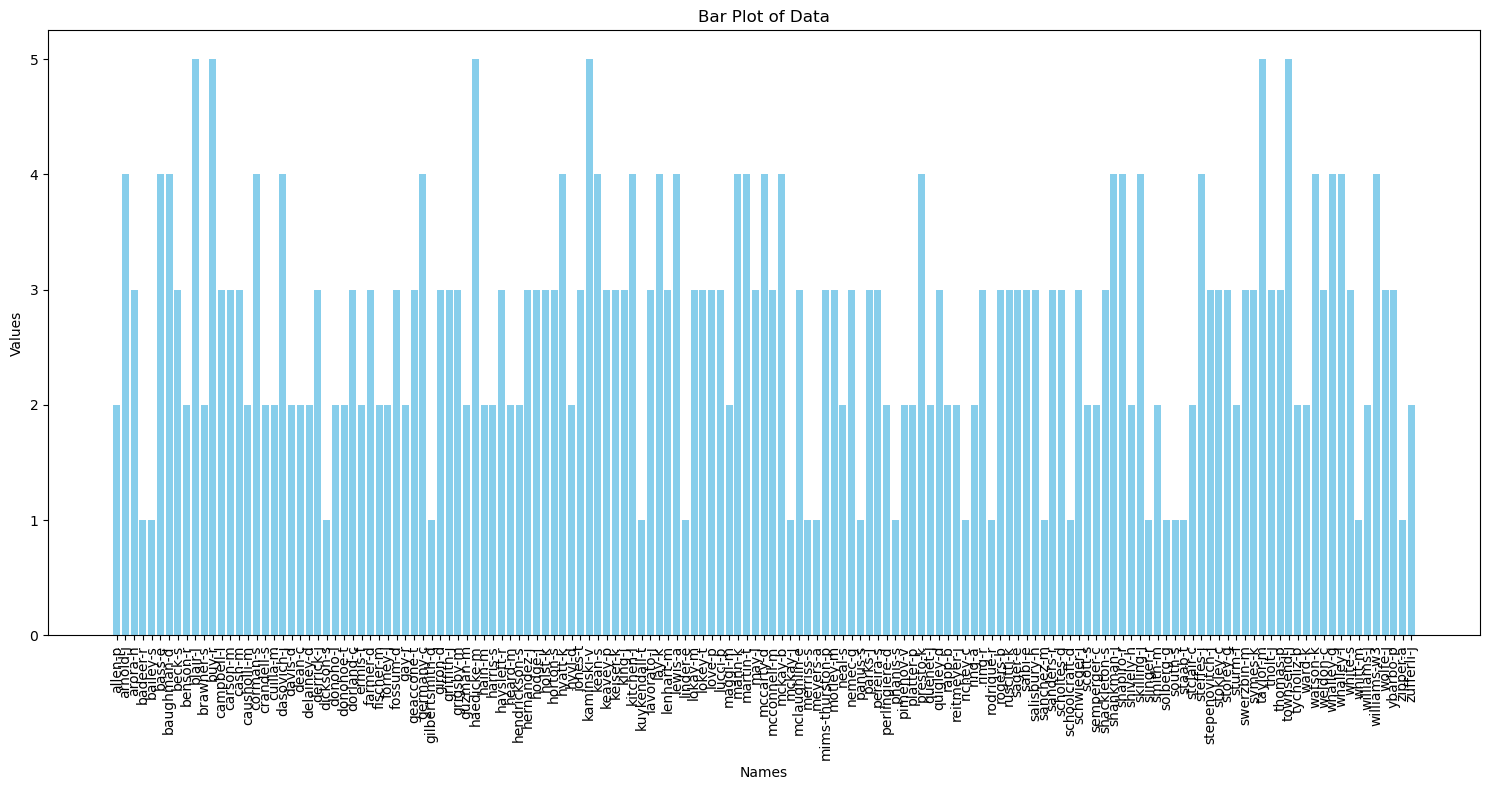

In [67]:
# Extract names and values
names = list(name_count.keys())
values = list(name_count.values())

# Plotting the bar plot
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
plt.bar(names, values, color='skyblue')

# Adding labels and title
plt.xlabel('Names')
plt.ylabel('Values')
plt.title('Bar Plot of Data')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()